In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
original_data = pd.read_csv("data/participants_data/1min/features/661_features.csv", sep=',')
model_features = pd.read_csv("data/participants_data/1min/features/661_test_30_pca_features.csv", sep=',')


In [5]:
original_data.shape

(525530, 28)

In [4]:
model_features.shape

(129086, 18)

In [3]:
model_features.columns.to_list()

['generation',
 'time_hour',
 'time_minute',
 'month',
 'day_of_week',
 'day',
 'week_of_year',
 'consumption',
 'mintempC',
 'totalSnow_cm',
 'sunHour',
 'uvIndex',
 'moon_illumination',
 'cloudcover',
 'humidity',
 'precipMM',
 'visibility',
 'winddirDegree']

In [ ]:
Index(['generation', 'time_hour', 'time_minute', 'month', 'day_of_week', 'day',
       'week_of_year', 'consumption', 'mintempC', 'totalSnow_cm', 'sunHour',
       'uvIndex', 'moon_illumination', 'cloudcover', 'humidity', 'precipMM',
       'visibility', 'winddirDegree'],
      dtype='object')

In [46]:
forecasting_data = original_data[model_features.columns.to_list()].iloc[129191: 129350]
forecasting_data

,generation,time_hour,time_minute,month,day_of_week,day,week_of_year,consumption,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,cloudcover,humidity,precipMM,visibility,winddirDegree
129191,0.977,18,11,3,5,31,13,1.021,13,0.0,11.6,6,96,0,71,0.0,10,169
129192,0.954,18,12,3,5,31,13,0.870,13,0.0,11.6,6,96,0,71,0.0,10,169
129193,0.950,18,13,3,5,31,13,0.878,13,0.0,11.6,6,96,0,71,0.0,10,169
129194,0.941,18,14,3,5,31,13,0.895,13,0.0,11.6,6,96,0,71,0.0,10,169
129195,0.948,18,15,3,5,31,13,0.916,13,0.0,11.6,6,96,0,71,0.0,10,169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129345,0.000,20,45,3,5,31,13,2.221,13,0.0,11.6,6,96,19,76,0.0,10,162
129346,0.000,20,46,3,5,31,13,2.213,13,0.0,11.6,6,96,19,76,0.0,10,162
129347,0.000,20,47,3,5,31,13,2.214,13,0.0,11.6,6,96,19,76,0.0,10,162
129348,0.000,20,48,3,5,31,13,2.205,13,0.0,11.6,6,96,19,76,0.0,10,162


In [47]:
to_insert_data = original_data[model_features.columns.to_list()].iloc[model_features.shape[0]: 129191]
to_insert_data

,generation,time_hour,time_minute,month,day_of_week,day,week_of_year,consumption,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,cloudcover,humidity,precipMM,visibility,winddirDegree
129086,3.787,16,26,3,5,31,13,-2.787,13,0.0,11.6,6,96,0,61,0.0,10,178
129087,3.834,16,27,3,5,31,13,-2.833,13,0.0,11.6,6,96,0,61,0.0,10,178
129088,3.891,16,28,3,5,31,13,-2.887,13,0.0,11.6,6,96,0,61,0.0,10,178
129089,3.881,16,29,3,5,31,13,-2.880,13,0.0,11.6,6,96,0,61,0.0,10,178
129090,3.805,16,30,3,5,31,13,-2.806,13,0.0,11.6,6,96,0,61,0.0,10,178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129186,1.237,18,6,3,5,31,13,1.130,13,0.0,11.6,6,96,0,71,0.0,10,169
129187,1.207,18,7,3,5,31,13,3.696,13,0.0,11.6,6,96,0,71,0.0,10,169
129188,1.183,18,8,3,5,31,13,3.691,13,0.0,11.6,6,96,0,71,0.0,10,169
129189,1.158,18,9,3,5,31,13,0.973,13,0.0,11.6,6,96,0,71,0.0,10,169


In [48]:
new_df = model_features.copy()
new_df

,generation,time_hour,time_minute,month,day_of_week,day,week_of_year,consumption,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,cloudcover,humidity,precipMM,visibility,winddirDegree
0,0.000,0,0,1,0,1,1,0.691,-4,0.0,10.0,1,97,93,57,0.0,10,9
1,0.000,0,1,1,0,1,1,0.689,-4,0.0,10.0,1,97,93,57,0.0,10,9
2,0.000,0,2,1,0,1,1,0.688,-4,0.0,10.0,1,97,93,57,0.0,10,9
3,0.000,0,3,1,0,1,1,0.688,-4,0.0,10.0,1,97,93,57,0.0,10,9
4,0.000,0,4,1,0,1,1,0.687,-4,0.0,10.0,1,97,93,57,0.0,10,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129081,3.568,16,21,3,5,31,13,-2.304,13,0.0,11.6,6,96,0,61,0.0,10,178
129082,3.517,16,22,3,5,31,13,-2.255,13,0.0,11.6,6,96,0,61,0.0,10,178
129083,3.511,16,23,3,5,31,13,-2.256,13,0.0,11.6,6,96,0,61,0.0,10,178
129084,3.569,16,24,3,5,31,13,-2.328,13,0.0,11.6,6,96,0,61,0.0,10,178


In [49]:
new_trained_data = pd.concat([new_df, to_insert_data])
new_trained_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
generation,129191.0,0.806444,1.446680,0.000,0.000,0.000,0.889,5.943
time_hour,129191.0,11.479886,6.913478,0.000,5.000,11.000,17.000,23.000
time_minute,129191.0,29.497914,17.318932,0.000,14.000,29.000,44.000,59.000
month,129191.0,1.996834,0.829397,1.000,1.000,2.000,3.000,3.000
day_of_week,129191.0,2.959765,1.985034,0.000,1.000,3.000,5.000,6.000
day,129191.0,15.493657,8.687741,1.000,8.000,15.000,23.000,31.000
week_of_year,129191.0,6.915520,3.700087,1.000,4.000,7.000,10.000,13.000
consumption,129191.0,0.597955,2.411223,-5.454,0.013,0.622,1.192,18.704
mintempC,129191.0,8.930676,6.184281,-6.000,5.000,9.000,14.000,20.000
totalSnow_cm,129191.0,0.025636,0.241469,0.000,0.000,0.000,0.000,2.300


In [53]:
new_trained_data.to_csv('data/participants_data/1min/features/661_test_30_pca2_features.csv', sep=',', index=False)

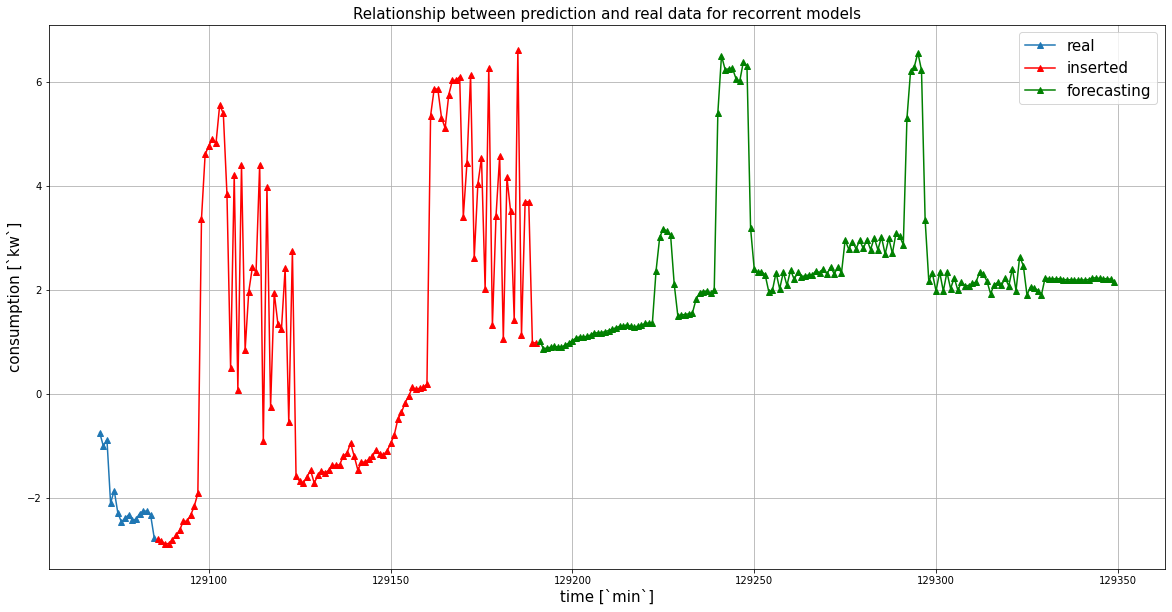

In [43]:
plt.figure(figsize=(20, 10))
plt.title(f'Relationship between prediction and real data for recorrent models', fontsize=15)
plt.plot(new_df.index[129070:129086], new_df.consumption[129070:129086], '^', ls='-',label='real')
plt.plot(to_insert_data.index, to_insert_data.consumption, '^', ls='-', color='red', label='inserted')
plt.plot(forecasting_data.index, forecasting_data.consumption, '^', ls='-', color='green', label='forecasting')


# plt.plot(output, 'm--', label='predictions')

plt.xlabel('time [`min`]', fontsize=15)
plt.ylabel('consumption [`kw`]', fontsize=15)
plt.legend(fontsize=15)
# plt.savefig(f'methodology/imgs/results/forecasting/others_models_forecasting.eps', dpi=600, bbox_inches='tight')
# plt.savefig(f'methodology/imgs/results/forecasting/others_models_forecasting.svg', dpi=600, bbox_inches='tight')
plt.grid()
plt.show()